<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [16]:
sac = pd.read_csv('C:/Users/huda1/Documents/test-repo/unit-3/linear-regression/data/sacramento_real_estate_transactions.csv')


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%matplotlib inline

In [19]:
sac.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [20]:
sac.dtypes #sale_date is an object - should be datetime

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [21]:
sac.describe() #there are negative prices and sq fts

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [22]:
sac.count()

street       985
city         985
zip          985
state        985
beds         985
baths        985
sq__ft       985
type         985
sale_date    985
price        985
latitude     985
longitude    985
dtype: int64

In [25]:
sac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [28]:
mask = sac.isnull() == True
sac[mask]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
sac['sale_date']= pd.to_datetime(sac['sale_date']) #convert date to datetime datatype
sac.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   street     985 non-null    object        
 1   city       985 non-null    object        
 2   zip        985 non-null    int64         
 3   state      985 non-null    object        
 4   beds       985 non-null    int64         
 5   baths      985 non-null    int64         
 6   sq__ft     985 non-null    int64         
 7   type       985 non-null    object        
 8   sale_date  985 non-null    datetime64[ns]
 9   price      985 non-null    int64         
 10  latitude   985 non-null    float64       
 11  longitude  985 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 92.5+ KB


C:\Users\huda1\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [31]:
sac.sale_date.head()

0   2008-05-21
1   2008-05-21
2   2008-05-21
3   2008-05-21
4   2008-05-21
Name: sale_date, dtype: datetime64[ns]

In [32]:
sac.loc[sac.price < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,2008-05-16,-210944,-121.503471,38.668433


In [34]:
sac.loc[sac.sq__ft < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,2008-05-16,-210944,-121.503471,38.668433


In [35]:
sac.price.replace(-210944, 210944, inplace = True)

In [36]:
sac.loc[sac.price < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [37]:
sac.sq__ft.replace(-984, 984, inplace = True)
sac.loc[sac.sq__ft < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [62]:
# A 
feature_cols = 'zip', 'sq__ft', 'beds', 'baths', 'type'

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

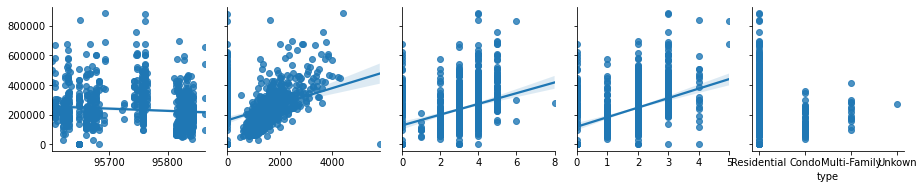

In [63]:
sns.pairplot(sac, 
             x_vars=feature_cols, 
             y_vars='price', 
             kind='reg'); #regression plot

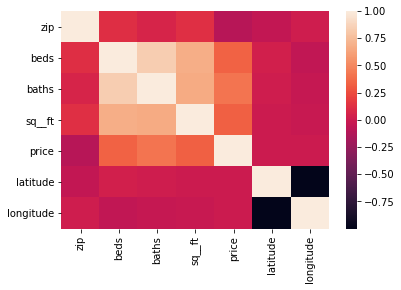

In [54]:
sns.heatmap(sac.corr()) #sq__ft, beds, baths have the highest correlation

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [59]:
# A: baths would be the best predictor, beds and sq__ft are also good predictors.  They have the highest correlation 
#per the heatmap

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


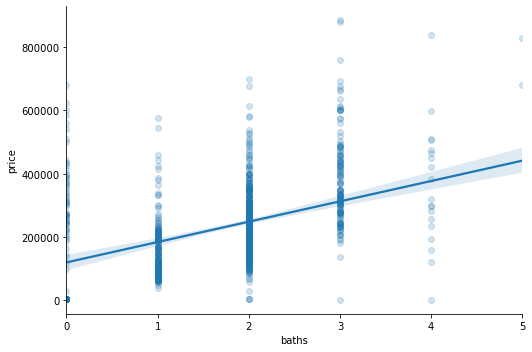

In [142]:
sns.lmplot(x='baths', 
           y='price', 
           data=sac, 
           aspect=1.5, 
           scatter_kws={'alpha':0.2});

In [119]:
def minimizeSSE(X,Y):
    feature_cols = X
    #print(feature_cols)
    X = sac[feature_cols]
    y = sac[Y]

# Instantiate and fit.
    linreg = LinearRegression()
    linreg.fit(X, y)

    print('y intercept is:{}'.format(linreg.intercept_))
    print('slope coeff is:{}'.format(linreg.coef_))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=300)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test) #using model for prediction
    
    print("root mean squared error is: ", np.sqrt(mean_squared_error(y_test, y_pred))) #using model for inference

In [120]:
minimizeSSE(['baths'], ['price'])


y intercept is:[119872.75465555]
slope coeff is:[[64318.53523673]]
root mean squared error is:  125530.79762953315


### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A: a house with no baths would start at 119k; each bath adds 64k to house value

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A: prediction is done by training on the dataset and using a test set to predict an outcome
#y_pred = linreg.predict() was used to predict a value based on a X value not originally part of the model
#inference is testing a model to see how it best fits
#calculating the RMSE is an inference

### 8. Using the model you came up with in Problem 5, calculate and plot the residuals.

Text(0.5, 1.0, 'Residual plot')

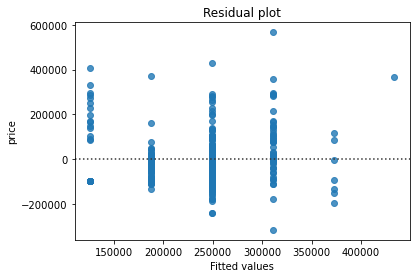

In [143]:
# A:

X = sac[['baths']]
y = sac['price']

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=300)
    
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
    
sns.residplot(y_pred, y_test, data=sac)
plt.xlabel("Fitted values")
plt.title('Residual plot')


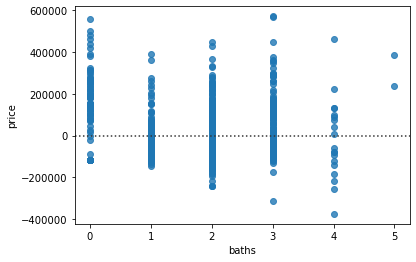

In [144]:
sns.residplot('baths', 'price', data=sac,)

### 9. Choose THREE predictor variables and repeat steps 5 & 6 with these added Variables

In [129]:
minimizeSSE(['beds', 'baths', 'sq__ft'], ['price'])


y intercept is:[122108.40091355]
slope coeff is:[[-8.01164405e+03  6.18961061e+04  1.93133645e+01]]
root mean squared error is:  124578.7057432584


In [ ]:
# A: a baseline price is 122k; each bath adds 61k to house value, each bed decreases 8k, each sqftage adds $19

### 10. Compare this multivariate model to the single predictor model.

How do they compare?

In [ ]:
#A: the root mean square error is slightly less with 2 more variables, but # of baths is a dominant predictor